The challenge that this notebook is going to tackle is one of image detection. The goal of this notebook is to develop a machine learning model that will allow for an image of an apple leaf to be quaternary classified as being health, having multiple diseases, or one of two diseases. 

The data that will be used in this assignment is provided by Kaggle (https://kaggle.com/competitions/plant-pathology-2020-fgvc7) and consists of 516 healthy, 91 multiple disease 622 rust and 592 scab leaves. The fact that one of these classes is severely underrepresented forced me to augment this data with additional copies that well be rooted and flipped during training. The images are also all dimension 2048x1365.

I first started out constructing a model form scratch like the one I used in the cancer detection chalange in week 3. The results of this model were extremely bad with only about a 5% accuracy for the validation set verses the > 90% accuracy against the training set, indicating overfit. After attempting to change the learning rate and increase the dropout rate to try and counter this overfitting, I decided that a more complex mode would be beneficial especially if transfer learning is utilized. 

I then trained my model on various iteration on the DenseNet model available in Keras, which achieved roughly 90% accuracy. Despite this high accuracy, I continued to tune by using different pretrained models, learning, and dropout rates to varying success. The additional tuning resulted in an over 96% accuracy of against the validation set. 

Due to this high accuracy, I would label this model as a success. And given this I think that this model can be deployed to inspect Apple trees and be adapted for additional leaves and desesases.


In [2]:
import os
import shutil

import random
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

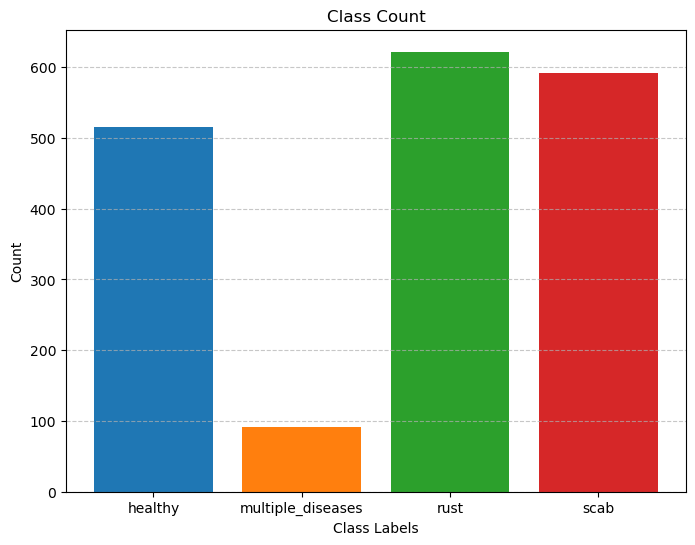

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("./data/plant-pathology-2020-fgvc7/train.csv")
train_df['img_name'] = train_df['image_id'] + ".jpg"
y_cols = ['healthy', 'multiple_diseases', 'rust', 'scab']
class_counts = train_df[y_cols].sum()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
print(class_counts)

In [8]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def balance_set(df, x_cols, y_cols):
    ros = RandomOverSampler(random_state=42)
    x_multi, y_multi = ros.fit_resample(df[x_cols], df[y_cols].values)
    data = pd.concat([x_multi, pd.DataFrame(y_multi, columns= y_cols)], axis=1)
    return data

balanced_df = balance_set(train_df, ["image_id", "img_name"], y_cols)
labels = balanced_df[y_cols]
label_names = labels[labels==1].stack().reset_index()['level_1']
label_names.index = balanced_df.index
balanced_df['label_names'] = label_names

print("Multi Classification Labels")
print(balanced_df[y_cols].sum())

Multi Classification Labels
healthy              622
multiple_diseases    622
rust                 622
scab                 622
dtype: int64


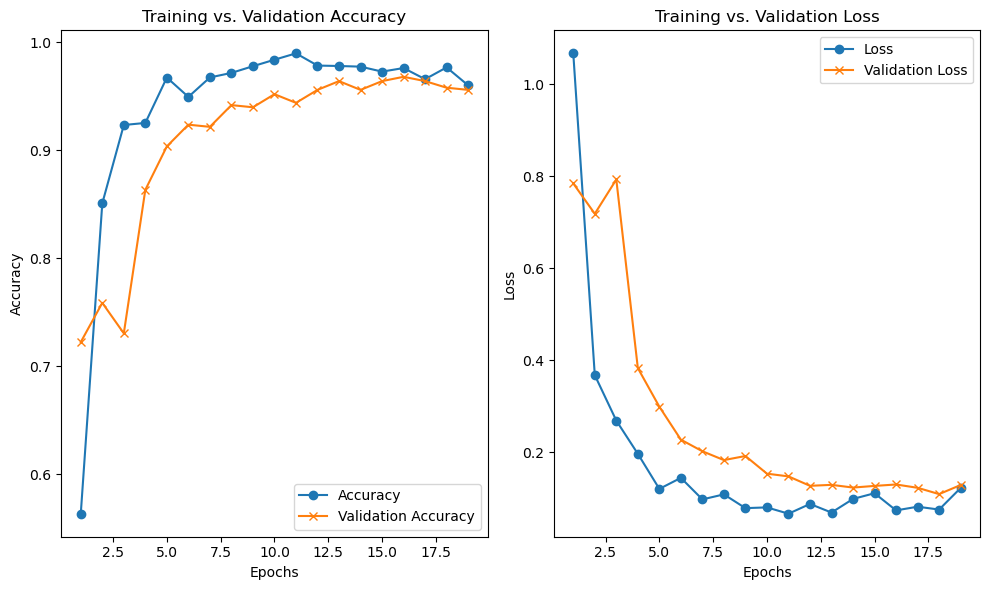

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#DenseNet201
df = pd.read_csv("./e_history.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


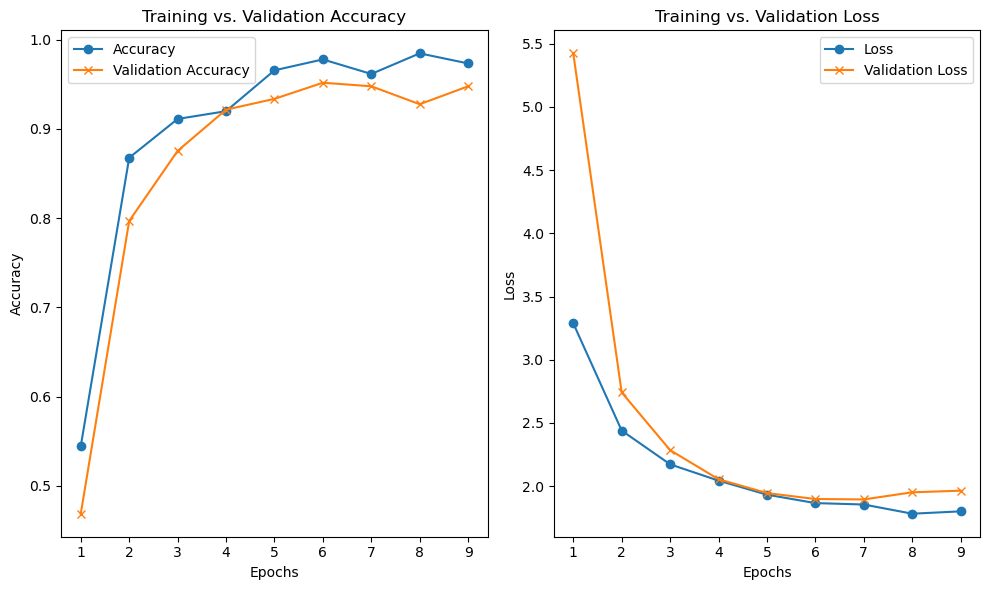

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#InceptionResNetV2
df = pd.read_csv("./e_history_2.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

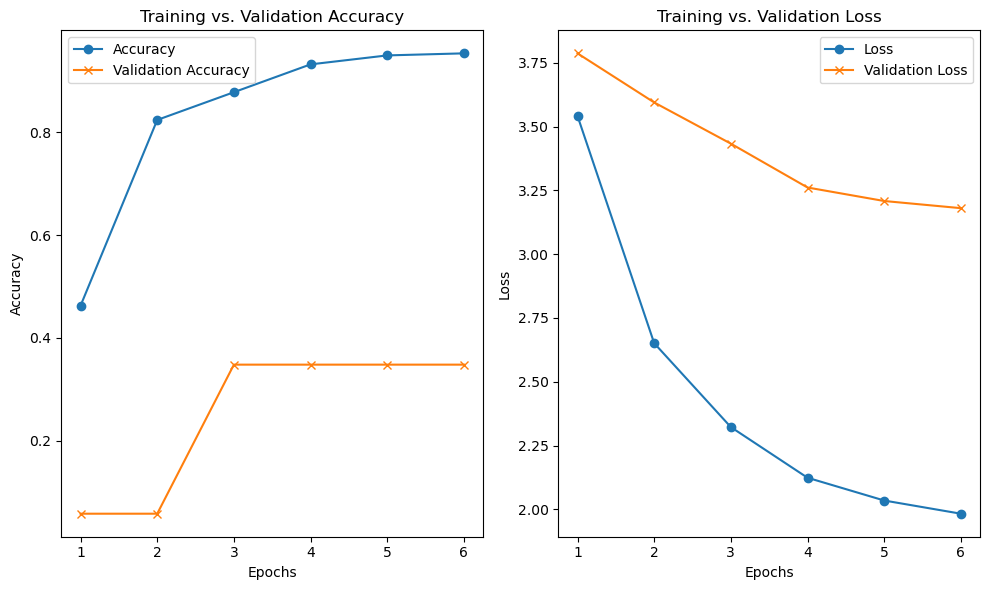

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#EfficientNetV2L
df = pd.read_csv("./e_history_3.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

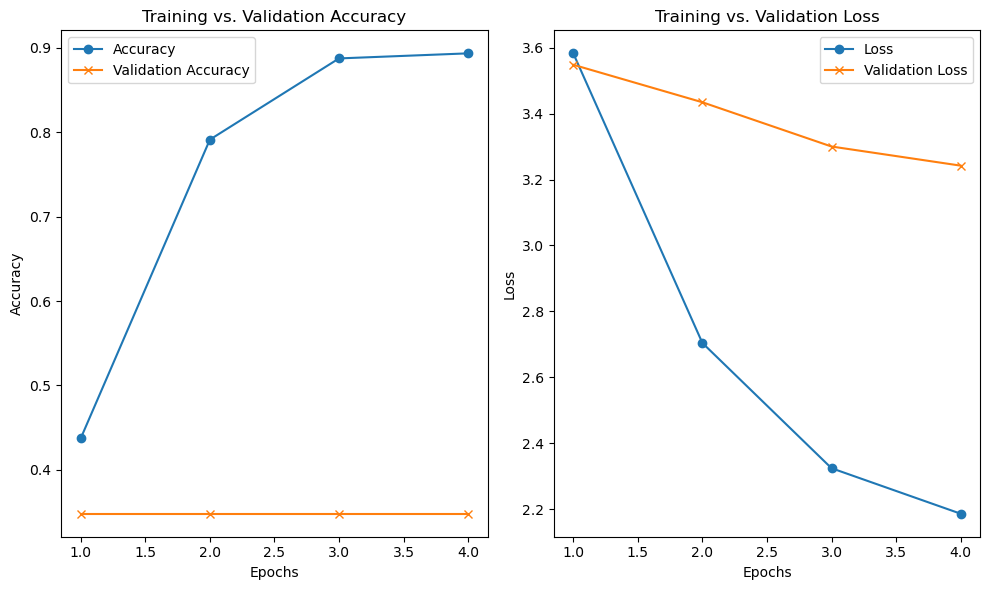

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#EfficientNetB5
df = pd.read_csv("./e_history_4.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

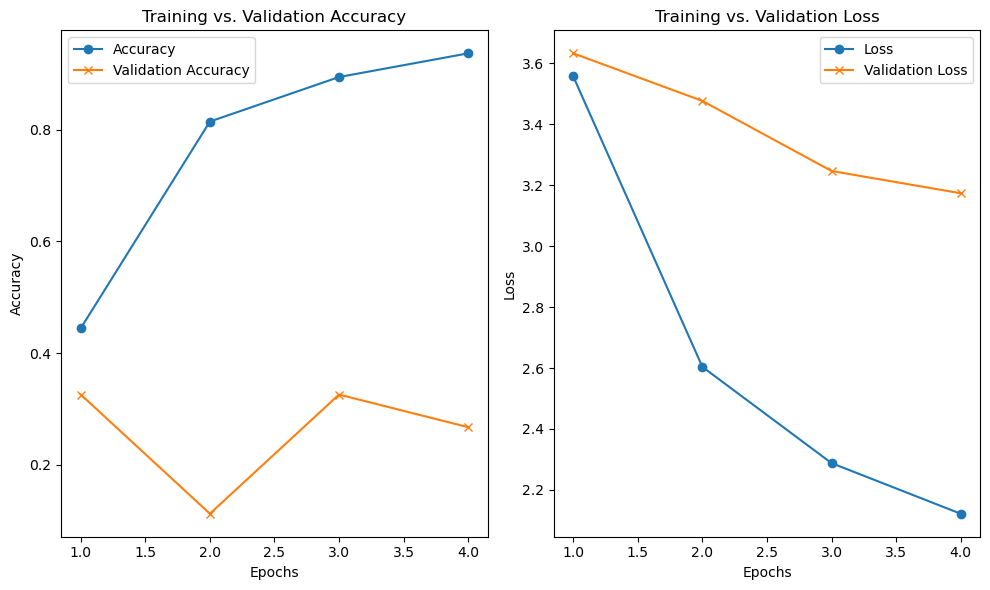

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#EfficientNetB5 standard weights
df = pd.read_csv("./e_history_5.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

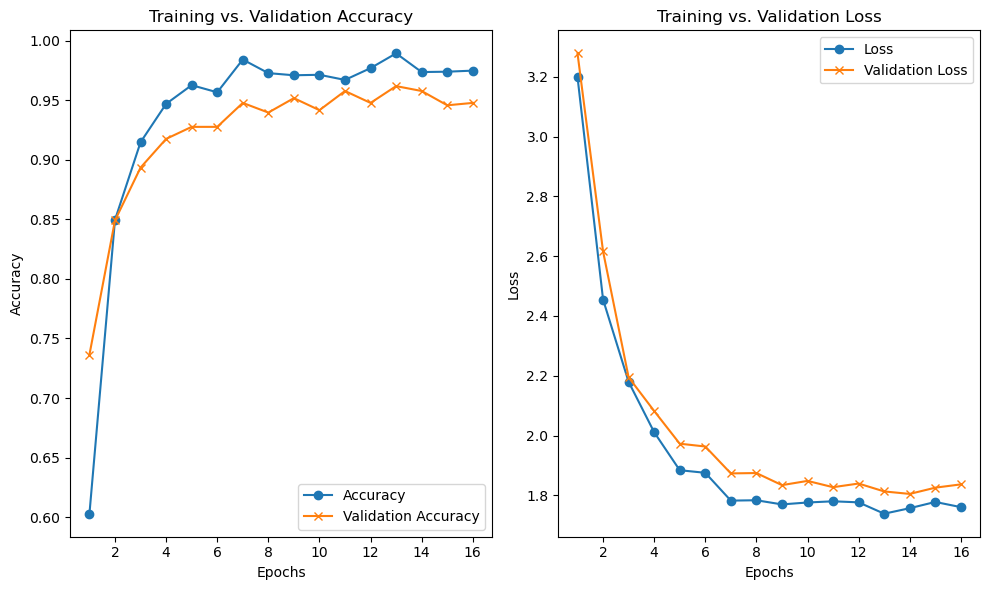

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#InceptionResNetV2 standard weights
df = pd.read_csv("./e_history_6.csv")

epochs = df['Epoch'] 
accuracy = df['accuracy']
loss = df['loss']
val_accuracy = df['val_accuracy']
val_loss = df['val_loss']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

#tf.random.set_seed(99)

## Initalize Image Data Generator with Augmentation
img_data_generator = ImageDataGenerator(rescale=1/255, 
                                        validation_split=0.2,
                                        rotation_range = 180,
                                        horizontal_flip = True,
                                        vertical_flip = True,
                                       )

data_dir = "./data/plant-pathology-2020-fgvc7/images/"
## Recreate datasets from dataframe
train_data_multi = img_data_generator.flow_from_dataframe(dataframe=balanced_df,
                                                    directory=data_dir,
                                                    x_col="img_name",
                                                    y_col= "label_names",
                                                    target_size=(256, 256),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=42)

val_data_multi = img_data_generator.flow_from_dataframe(dataframe=balanced_df,
                                                    directory=data_dir,
                                                    x_col="img_name",
                                                    y_col="label_names",
                                                    target_size=(256, 256),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    subset='validation',
                                                    shuffle=True,
                                                    seed=42)



learning_rate_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.0003, 
                                                                         decay_steps=2, 
                                                                         decay_rate=0.97, 
                                                                         staircase=False)


try:
    os.mkdir("../tmp")
except:
    print("Directory /tmp already exists")

checkpoint = tf.keras.callbacks.ModelCheckpoint("../tmp/multi_class_weights_1.weights.h5", 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=False,
                                                save_weights_only=True)

In [ ]:
from tensorflow.keras.applications import DenseNet201, InceptionResNetV2, EfficientNetV2L, NasNetLarge
import cv2

class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    
    def on_train_begin(self, logs=None):
        self.patience = 3
        self.best = 0
        self.wait = 0
    
    def on_epoch_end(self, epoch, logs=None):
        if np.greater(logs["val_accuracy"], self.best):
            self.wait = 0
            self.best = logs["val_accuracy"]
        else:
            self.wait +=1
            if self.wait >= self.patience:
                print(f"Stopping Training. Validation accuracy hasn't improved >= {self.patience} times")
                self.model.stop_training=True




def dense_net_model(trainable_weights=False, weights_path=None):
    
    tf.keras.backend.clear_session()
    
    dense_net = EfficientNetV2L(input_shape=(256, 256, 3), weights="imagenet", include_top=False)
    
    for layer in dense_net.layers:
        layer.trainable=trainable_weights
    
    model = tf.keras.models.Sequential([dense_net,
                                        tf.keras.layers.GlobalAveragePooling2D(),
                                        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                        tf.keras.layers.Dropout(0.3),
                                        tf.keras.layers.Dense(4, activation='softmax')
                                ])
    
    if weights_path:
        model.load_weights(weights_path)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_scheduler)
    
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    
    return model

dense_net_transfer = dense_net_model(trainable_weights=True)
dense_net_transfer_history = dense_net_transfer.fit(train_data_multi, validation_data=val_data_multi, epochs=25, steps_per_epoch=32, callbacks=[checkpoint, EarlyStoppingCallback()])
